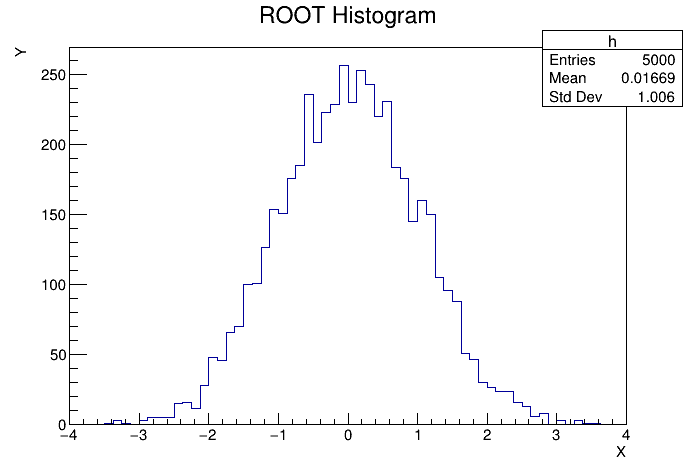

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


In [6]:
TCanvas c;
TH1F h("h","ROOT Histogram;X;Y",64,-4,4);
h.FillRandom("gaus");
h.Draw();
c.Draw();

In [2]:
#include <TString.h>
#include "TTree.h"
#include "TFile.h"
#include "TChain.h"
#include "TLorentzVector.h"
#include <vector>
#include "iostream"
#include "fstream"
using namespace std;

In [3]:
TChain *ch = new TChain("Delphes", "");
ch->Add("../tag_1_delphes_events.root");
TTree *Delphes = (TTree*)ch;
Delphes->MakeClass("MyClass1"); // Crea la clase de lectura de la TTree

Warning in <TClass::Init>: no dictionary for class HepMCEvent is available
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Weight is available
Warning in <TClass::Init>: no dictionary for class GenParticle is available
Warning in <TClass::Init>: no dictionary for class SortableObject is available
Warning in <TClass::Init>: no dictionary for class Track is available
Warning in <TClass::Init>: no dictionary for class Tower is available
Warning in <TClass::Init>: no dictionary for class Jet is available
Warning in <TClass::Init>: no dictionary for class MissingET is available
Warning in <TClass::Init>: no dictionary for class Electron is available
Warning in <TClass::Init>: no dictionary for class Photon is available
Warning in <TClass::Init>: no dictionary for class Muon is available
Warning in <TClass::Init>: no dictionary for class ScalarHT is available
Info in <TTreePlayer::MakeClass>: Files: MyClass1.h and MyCla

In [4]:
#include "MyClass1.C"

In [5]:
MyClass1 t(Delphes); // Evalúa la clase de lectura de la TTree
Long64_t nentries = 30000;//t.fChain->GetEntries(); // Obtiene el número de entradas en la TTree 

In [6]:
TH1F *hJetsPerEvent = new TH1F("hJetsPerEvent", "Numero de Jets por Evento", 100, 0, 6);

In [7]:
TH1F *hJetPT[4];
for (int i = 0; i < 4; i++) {
hJetPT[i] = new TH1F(Form("hJetPT%d", i), Form("pT del Jet %d", i+1), 100, 0, 150); // Ajusta los límites según sea necesario

// Asigna un color único a cada histograma
if(i == 0) hJetPT[i]->SetLineColor(kRed);
else if(i == 1) hJetPT[i]->SetLineColor(kBlue);
else if(i == 2) hJetPT[i]->SetLineColor(kGreen);
else if(i == 3) hJetPT[i]->SetLineColor(kBlack);

// Opcional: Establece el estilo de línea
//hJetPT[i]->SetLineStyle(i + 1); // Diferentes estilos de línea para cada histograma

// Opcional: Establece el grosor de la línea
hJetPT[i]->SetLineWidth(2);
}

In [8]:
// Eta de los jets
TH1F *hJetEta[4];
for (int i = 0; i < 4; i++) {
    hJetEta[i] = new TH1F(Form("hJetEta%d", i), Form("Eta del Jet %d", i+1), 100, -5, 5); // Ajusta los límites según sea necesario

// Asigna un color único a cada histograma
if(i == 0) hJetEta[i]->SetLineColor(kRed);
else if(i == 1) hJetEta[i]->SetLineColor(kBlue);
else if(i == 2) hJetEta[i]->SetLineColor(kGreen);
else if(i == 3) hJetEta[i]->SetLineColor(kBlack);

// Opcional: Establece el estilo de línea
hJetEta[i]->SetLineStyle(i + 1); // Diferentes estilos de línea para cada histograma

// Opcional: Establece el grosor de la línea
hJetEta[i]->SetLineWidth(2);
}

In [9]:
// Phi de los jets
TH1F *hJetPhi[4];
for (int i = 0; i < 4; i++) {
    hJetPhi[i] = new TH1F(Form("hJetPhi%d", i), Form("Phi del Jet %d", i+1), 100, -4, 4); // Ajusta los límites según sea necesario
    // Asigna un color único a cada histograma
if(i == 0) hJetPhi[i]->SetLineColor(kRed);
else if(i == 1) hJetPhi[i]->SetLineColor(kBlue);
else if(i == 2) hJetPhi[i]->SetLineColor(kGreen);
else if(i == 3) hJetPhi[i]->SetLineColor(kBlack);

// Opcional: Establece el estilo de línea
hJetPhi[i]->SetLineStyle(i + 1); // Diferentes estilos de línea para cada histograma

// Opcional: Establece el grosor de la línea
hJetPhi[i]->SetLineWidth(2);
}

In [10]:
// Número de neutras cargadas por jet
TH1F *hChargedParticles[4];
for (int i = 0; i < 4; i++) {
    hChargedParticles[i] = new TH1F(Form("hChargedParticles%d", i), Form("Numero de Partículas Cargadas del Jet %d", i+1), 100, -0.5, 3.5);
// Asigna un color único a cada histograma
if(i == 0) hChargedParticles[i]->SetLineColor(kRed);
else if(i == 1) hChargedParticles[i]->SetLineColor(kBlue);
else if(i == 2) hChargedParticles[i]->SetLineColor(kGreen);
else if(i == 3) hChargedParticles[i]->SetLineColor(kBlack);

hChargedParticles[i]->SetLineStyle(i + 1); // Diferentes estilos de línea para cada histograma
hChargedParticles[i]->SetLineWidth(2);
}

In [11]:
// Número de neutras neutras por jet
TH1F *hNeutralsParticles[4];
for (int i = 0; i < 4; i++) {
    hNeutralsParticles[i] = new TH1F(Form("hNeutralsParticles%d", i), Form("Numero de Partículas Neutras del Jet %d", i+1), 100, -0.5, 3.5);
// Asigna un color único a cada histograma
if(i == 0) hNeutralsParticles[i]->SetLineColor(kRed);
else if(i == 1) hNeutralsParticles[i]->SetLineColor(kBlue);
else if(i == 2) hNeutralsParticles[i]->SetLineColor(kGreen);
else if(i == 3) hNeutralsParticles[i]->SetLineColor(kBlack);

hNeutralsParticles[i]->SetLineStyle(i + 1); // Diferentes estilos de línea para cada histograma
hNeutralsParticles[i]->SetLineWidth(2);
}

In [58]:
TH1F *hFractionPTCharged[4]; // Array de histogramas para la fracción de pT cargado por jet

for (int i = 0; i < 4; i++) {
    hFractionPTCharged[i] = new TH1F(Form("hFractionPTCharged%d", i), Form("Fracción de pT Cargado del Jet %d", i+1), 100, 0.0, 1.0);
}

Warning in <TROOT::Append>: Replacing existing TH1: hFractionPTCharged0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hFractionPTCharged1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hFractionPTCharged2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hFractionPTCharged3 (Potential memory leak).


In [86]:
TH1F *hFractionPTNeutral[4]; // Array de histogramas para la fracción de pT neutro por jet

for (int i = 0; i < 4; i++) {
    hFractionPTNeutral[i] = new TH1F(Form("hFractionPTNeutral%d", i), Form("Fracción de pT Cargado del Jet %d", i+1), 100, 0.0, 1.0);
}

In [12]:
cout << " Entries : " << nentries << endl;

 Entries : 30000


In [87]:
Int_t nTen = nentries / 10; // Para imprimir el porcentaje de avance
Int_t k = 0;
Int_t nbytes = 0, nb = 0;

vector<TLorentzVector> jets; // Vector para almacenar los jets
vector<TLorentzVector> particles; // Vector para almacenar las particles
vector<TLorentzVector> fractionPTCharged; // Vector para almacenar la fracción de pT cargado
for (Long64_t jentry = 0; jentry < nentries; jentry++)
{

    jets.clear();
    particles.clear();
    fractionPTCharged.clear();

    Long64_t ientry = t.LoadTree(jentry); 
    if (ientry < 0)                        // Para imprimir el porcentaje de avance
        break;
    nb = t.fChain->GetEntry(jentry);
    nbytes += nb;

    if (jentry % nTen == 0)
        cout << 10 * (jentry / nTen) << "%-" << flush;
    if (jentry == nentries - 1)
        cout << "100%"<< endl;

    if (t.Jet_size == 0) continue;

    // Escribe en el archivo CSV de los jets
    for (Int_t i = 0; i < t.Jet_size; i++)
    {
        TLorentzVector jetVector;
        jetVector.SetPtEtaPhiM(t.Jet_PT[i], t.Jet_Eta[i], t.Jet_Phi[i], t.Jet_Mass[i]);
        jets.push_back(jetVector);

    }
    
    // Escribe en el archivo CSV de las partículas
    for (Int_t i = 0; i < t.Particle_size; i++)
    {
        // Filling particles vector
        TLorentzVector particleVector;
        particleVector.SetPtEtaPhiM(t.Particle_PT[i], t.Particle_Eta[i], t.Particle_Phi[i], t.Particle_Mass[i]); // Filling particles vector
        particles.push_back(particleVector);
    }


    vector<vector<Double_t>> deltaRValues(jets.size());
    for (size_t i = 0; i < jets.size(); ++i) {
    //deltaRValues[i].reserve(particles.size()); // Para optimizar la asignación de memoria

    for (size_t j = 0; j < particles.size(); ++j) {
        Double_t deltaR = jets[i].DeltaR(particles[j]);
        if (deltaR < 0.4){
        deltaRValues[i].push_back(deltaR); // Aquí debería ser seguro hacer push_back
    }
    }

}
    // Histograma de jets por evento
    hJetsPerEvent->Fill(t.Jet_size);

    // Histograma de pT de los jets
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hJetPT[i]->Fill(t.Jet_PT[i]);
    }
    // Histograma de Eta de los jets
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hJetEta[i]->Fill(t.Jet_Eta[i]);
    }
    // Histograma de Phi de los jets
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hJetPhi[i]->Fill(t.Jet_Phi[i]);
    }

    // Histograma de Número de partículas cargadas por jet
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hChargedParticles[i]->Fill(t.Jet_NCharged[i]);
    }

    // Histograma de Número de partículas neutras por jet
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hNeutralsParticles[i]->Fill(t.Jet_NNeutrals[i]);
    }

    // Histograma de  Fracción de pT cargado del jet
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hFractionPTCharged[i]->Fill(t.Jet_ChargedEnergyFraction[i]);
    }

    // Histograma de  Fracción de pT cargado del jet
    for (int i = 0; i < std::min(4, t.Jet_size); i++) {
    hFractionPTNeutral[i]->Fill(t.Jet_NeutralEnergyFraction[i]);
    }
}

0%-10%-20%-30%-40%-50%-60%-70%-80%-90%-100%


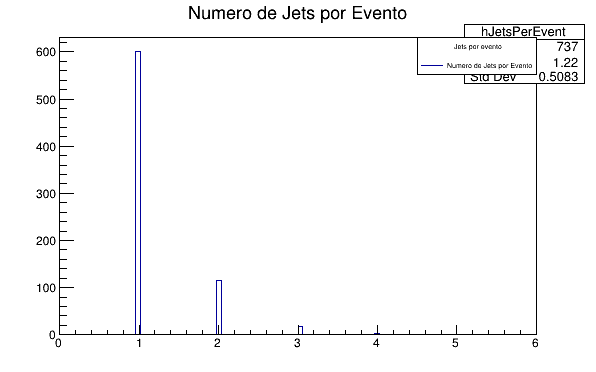

In [14]:
// Dibuja el histograma
// Dibujar histograma de jets por evento
TCanvas *cJets = new TCanvas("cJets", "Jets por evento", 600, 400);
hJetsPerEvent->Draw();
TLegend *legendevnt = new TLegend(0.7, 0.8, 0.9, 0.9);
legendevnt->SetHeader("Jets por evento", "C");
legendevnt->AddEntry(hJetsPerEvent, "Numero de Jets por Evento", "l");
legendevnt->Draw();
cJets->Draw();

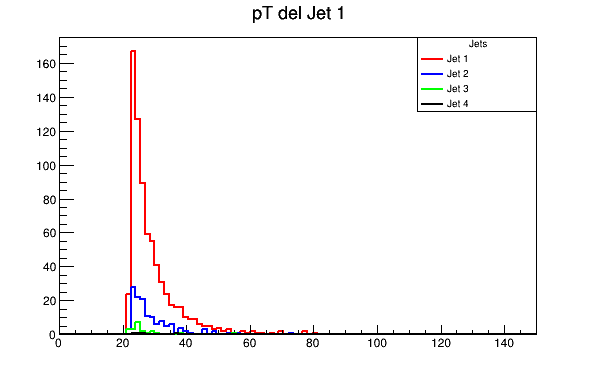

In [15]:
// Dibujar histograma de pT de los jets
TCanvas *c1 = new TCanvas("c1", "pT de los Jets", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hJetPT[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hJetPT[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legend = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legend->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legend->AddEntry(hJetPT[i], Form("Jet %d", i+1), "l");
}
legend->Draw();

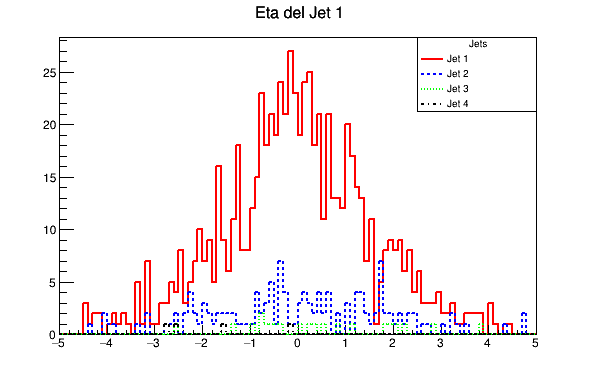

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cEta


In [17]:
TCanvas *cEta = new TCanvas("cEta", "Eta de los Jets", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hJetEta[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hJetEta[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legendEta = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legendEta->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legendEta->AddEntry(hJetEta[i], Form("Jet %d", i+1), "l");
}
legendEta->Draw();

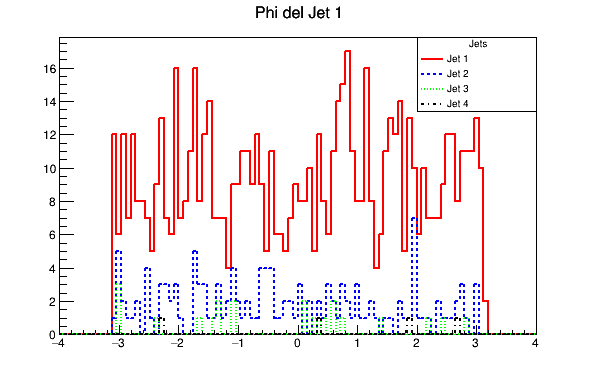

In [18]:
TCanvas *cPhi = new TCanvas("cPhi", "Phi de los Jets", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hJetPhi[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hJetPhi[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legendPhi = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legendPhi->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legendPhi->AddEntry(hJetPhi[i], Form("Jet %d", i+1), "l");
}
legendPhi->Draw();

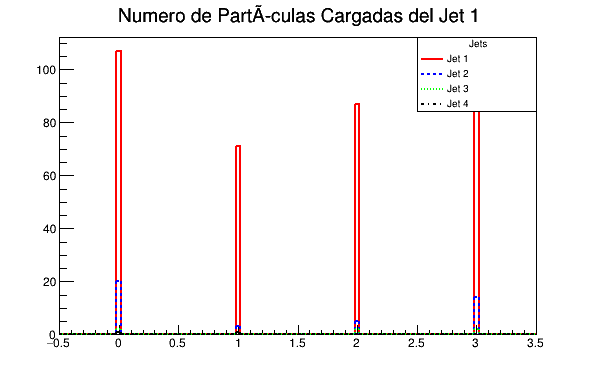

In [19]:
TCanvas *cNCharged = new TCanvas("cNCharged", "Numero de partículas cargadas por jet", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hChargedParticles[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hChargedParticles[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legendNCharged = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legendNCharged->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legendNCharged->AddEntry(hChargedParticles[i], Form("Jet %d", i+1), "l");
}
legendNCharged->Draw();

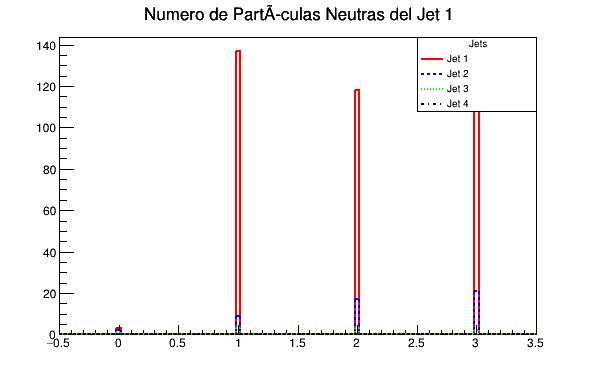

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cNNeutrals


In [24]:
TCanvas *cNNeutrals = new TCanvas("cNNeutrals", "Numero de partículas neutras por jet", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hNeutralsParticles[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hNeutralsParticles[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legendNNeutrals = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legendNNeutrals->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legendNNeutrals->AddEntry(hNeutralsParticles[i], Form("Jet %d", i+1), "l");
}
legendNNeutrals->Draw();

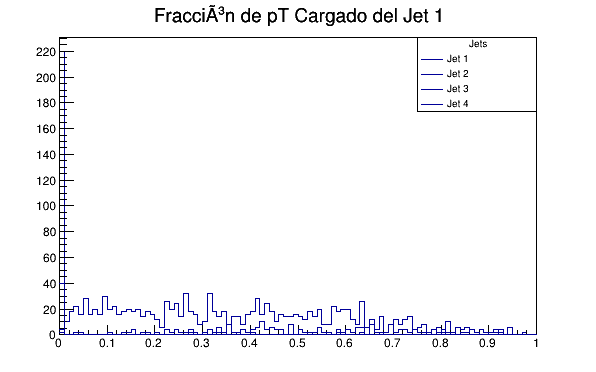

In [89]:
TCanvas *cChargedFrac = new TCanvas("cCharged", "Numero de partículas neutras por jet", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hFractionPTCharged[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hFractionPTCharged[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legendChardeFrac = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legendChardeFrac->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legendChardeFrac->AddEntry(hFractionPTCharged[i], Form("Jet %d", i+1), "l");
}
legendChardeFrac->Draw();

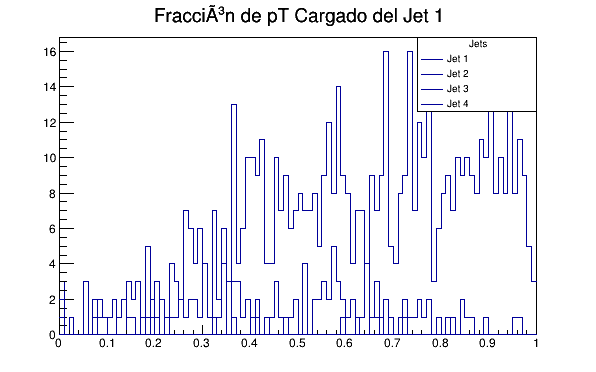

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cNeutrals


In [94]:
TCanvas *cNeutralFrac = new TCanvas("cNeutrals", "Numero de partículas neutras por jet", 600, 400);
gStyle->SetOptStat(0); // Desactiva la caja de estadísticas para todos los histogramas
hFractionPTNeutral[0]->Draw(); // Dibuja el primer histograma
for (int i = 1; i < 4; i++) {
    hFractionPTNeutral[i]->Draw("SAME"); // Superpone los siguientes histogramas
}
TLegend *legendChardeFrac = new TLegend(0.7, 0.7, 0.9, 0.9); // Ajusta la posición según sea necesario
legendChardeFrac->SetHeader("Jets", "C"); // Opcional: título de la leyenda
for (int i = 0; i < 4; i++) {
    legendChardeFrac->AddEntry(hFractionPTNeutral[i], Form("Jet %d", i+1), "l");
}
legendChardeFrac->Draw();

In [21]:
// Guardar los histogramas en un archivo
cJets->Print("/home/juan27/MLbtagging/Tomas_code/plots/JetsPerEvent.png");
c1->Print("/home/juan27/MLbtagging/Tomas_code/plots/PTjets.png");
cEta->Print("/home/juan27/MLbtagging/Tomas_code/plots/Etajets.png");
cPhi->Print("/home/juan27/MLbtagging/Tomas_code/plots/Phijets.png");
cNCharged->Print("/home/juan27/MLbtagging/Tomas_code/plots/NCharged.png");
cNNeutrals->Print("/home/juan27/MLbtagging/Tomas_code/plots/NNeutrals.png");

Info in <TCanvas::Print>: png file /home/juan27/MLbtagging/Tomas_code/plots/JetsPerEvent.png has been created
Info in <TCanvas::Print>: png file /home/juan27/MLbtagging/Tomas_code/plots/PTjets.png has been created
Info in <TCanvas::Print>: png file /home/juan27/MLbtagging/Tomas_code/plots/Etajets.png has been created
Info in <TCanvas::Print>: png file /home/juan27/MLbtagging/Tomas_code/plots/Phijets.png has been created
Info in <TCanvas::Print>: png file /home/juan27/MLbtagging/Tomas_code/plots/NCharged.png has been created
Info in <TCanvas::Print>: png file /home/juan27/MLbtagging/Tomas_code/plots/NNeutrals.png has been created


In [22]:
cout << "El archivo se escribió correctamente" << endl;
cout << "Fin del programa" << endl;

El archivo se escribió correctamente
Fin del programa
